# Exploring Vessel Diameter and Pulsatility Data from DANDI:001366

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

## Dataset Overview

This notebook explores data from DANDI:001366: "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification". The dataset contains movies of pial vessels in mice, captured to study vessel diameter and pulsatility.

Key dataset information:
- Contains high-speed imaging of pial vessels in mice
- Aimed at studying vessel diameter and pulsation dynamics
- Uses imaging through thinned skull over the middle cerebral artery (MCA)
- Part of research comparing different approaches for vessel analysis

## Required Packages

This notebook requires the following packages:
- pynwb: For reading NWB files
- lindi: For remote data access
- numpy: For numerical computations
- matplotlib: For visualization

These should be installed in your Python environment before running this notebook.

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Accessing the Dataset

First, let's use the DANDI API to list all assets in this dataset:

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001366")
assets = list(dandiset.get_assets())

print("Available NWB files:")
for asset in assets:
    print(f"- {asset.path}")

Available NWB files:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb


## Loading and Exploring Vessel Imaging Data

We'll load one of the NWB files containing vessel imaging data. The dataset contains two recordings:
1. sub-F15: Female mouse, age P9W/P16W
2. sub-031224-M4: Male mouse, age P2M

For this example, we'll examine the recording from sub-F15:

In [3]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001366/assets/71fa07fc-4309-4013-8edd-13213a86a67d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic metadata
print("Session Description:", nwb.session_description)
print("Subject ID:", nwb.subject.subject_id)
print("Subject Age:", nwb.subject.age)
print("Subject Species:", nwb.subject.species)

Session Description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Subject ID: F15
Subject Age: P9W/P16W
Subject Species: Mus musculus


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Vessel Images

The dataset contains high-speed imaging of pial vessels. Let's examine the imaging data:

Frame rate: 54.47 Hz
Number of frames: 9553
Recording duration: 175.38 seconds
Frame dimensions: (214, 132) pixels


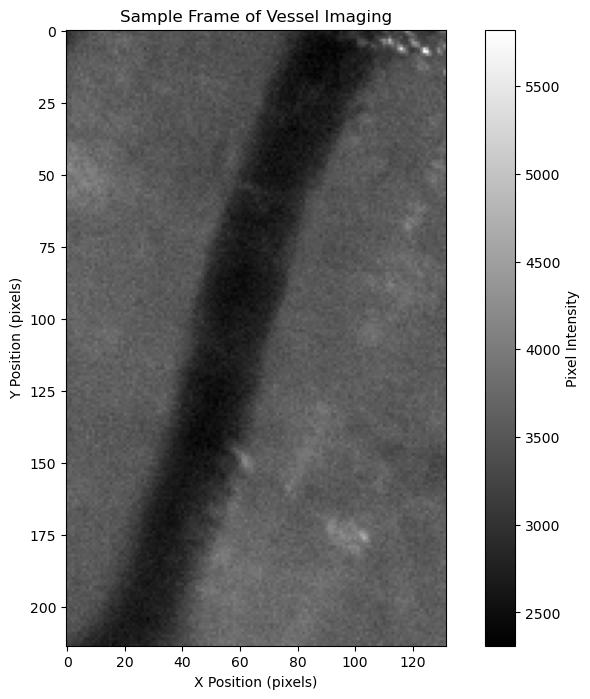

In [4]:
# Get the Movies data
movies = nwb.acquisition["Movies"]

# Get dimensions and sampling rate
frame_rate = movies.rate
n_frames = movies.data.shape[0]
print(f"Frame rate: {frame_rate:.2f} Hz")
print(f"Number of frames: {n_frames}")
print(f"Recording duration: {n_frames/frame_rate:.2f} seconds")
print(f"Frame dimensions: {movies.data.shape[1:]} pixels")

# Load and display a sample frame
sample_frame = movies.data[0, :, :]

plt.figure(figsize=(10, 8))
plt.imshow(sample_frame, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Sample Frame of Vessel Imaging')
plt.xlabel('X Position (pixels)')
plt.ylabel('Y Position (pixels)')
plt.show()

The image shows a pial vessel running diagonally across the field of view. The vessel appears as a dark structure against a brighter background, with good contrast for analysis.

Key image characteristics:
- Clear vessel structure with well-defined edges
- Good signal-to-noise ratio
- Resolution sufficient for vessel diameter analysis
- Grayscale intensity values represent vessel opacity

## Analyzing Vessel Intensity Over Time

To study vessel dynamics, we can analyze how the pixel intensities change over time. We'll select a region of interest (ROI) centered on the vessel:

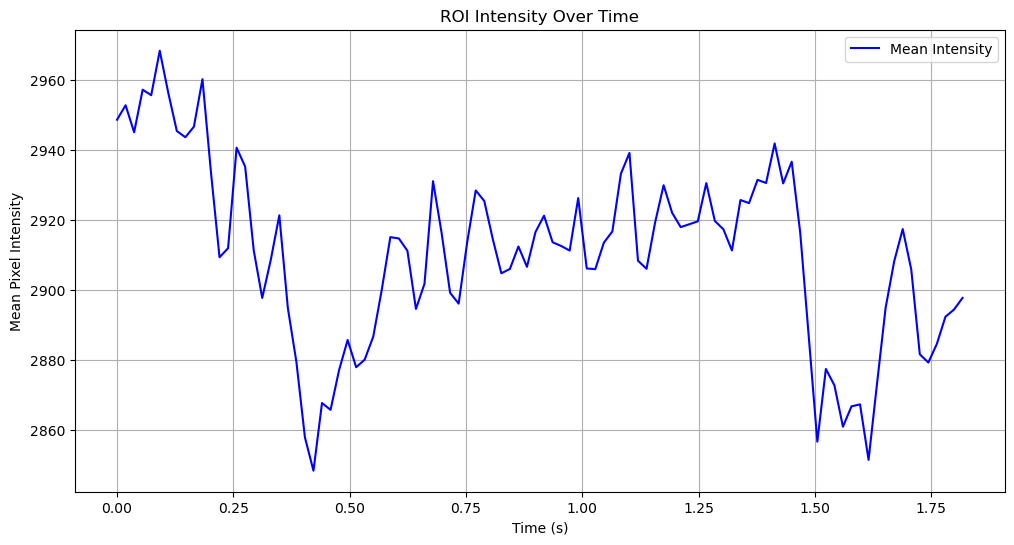

In [5]:
# Select central region for time series analysis
n_frames_analyze = 100  # Analyze first 100 frames for visualization
center_y, center_x = np.array(sample_frame.shape) // 2
roi_size = 10
roi = movies.data[:n_frames_analyze, center_y-roi_size:center_y+roi_size, center_x-roi_size:center_x+roi_size]

# Calculate mean intensity in ROI over time
mean_intensity = np.mean(roi, axis=(1,2))
timepoints = np.arange(n_frames_analyze) / frame_rate

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(timepoints, mean_intensity, 'b-', label='Mean Intensity')
plt.title('ROI Intensity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Mean Pixel Intensity')
plt.grid(True)
plt.legend()
plt.show()

The time series plot shows variations in vessel intensity over time. These fluctuations could reflect:
- Changes in vessel diameter
- Blood flow variations
- Vessel pulsatility

Note that this is just a basic analysis. For detailed vessel diameter measurements, you might want to:
1. Use more sophisticated vessel detection algorithms
2. Apply appropriate filtering and signal processing
3. Calculate actual vessel diameters using calibrated measurements
4. Analyze longer time periods for physiological patterns

## Additional Analysis Possibilities

This dataset enables various analyses, including:

1. Vessel Diameter Analysis:
   - Edge detection for precise diameter measurements
   - Cross-sectional intensity profiles
   - Automated diameter tracking over time

2. Pulsatility Analysis:
   - Frequency analysis of diameter changes
   - Correlation with physiological rhythms
   - Comparison between different vessel segments

3. Image Processing:
   - Signal filtering and enhancement
   - Motion correction if needed
   - Vessel segmentation and tracking

The specific analysis approach should be chosen based on your research questions and the desired measurements.

## References

For more information about this dataset, please refer to:
- DANDI Archive: https://dandiarchive.org/dandiset/001366
- Dataset Contributors: Ranjan et al., 2025
- Associated keywords: vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis